In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# Baseline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/УИР/dataset.csv", delimiter=";", decimal=",")
df.head()

,Eye_Left_Blink,Eye_Left_Wide,Eye_Left_Right,Eye_Left_Left,Eye_Left_Up,Eye_Left_Down,Eye_Right_Blink,Eye_Right_Wide,Eye_Right_Right,Eye_Right_Left,...,Tongue_Up,Tongue_Down,Tongue_Roll,Tongue_LongStep2,Tongue_UpRight_Morph,Tongue_UpLeft_Morph,Tongue_DownRight_Morph,Tongue_DownLeft_Morph,EmotionNum,Emotion
0,0.000000,0.143556,0.062867,-0.062867,0.143556,0.180122,0.000000,0.143556,0.062867,-0.062867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Afraid
1,0.000000,0.281156,0.063703,-0.063703,0.281156,0.161791,0.000000,0.281156,0.063703,-0.063703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Angry
2,0.121046,0.000000,0.060617,-0.060617,0.000000,0.185561,0.360418,0.000000,0.060617,-0.060617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,Disgust
3,0.000000,0.116391,0.052347,-0.052347,0.116391,0.158755,0.000000,0.116391,0.052347,-0.052347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Happy
4,0.000000,0.128687,0.056471,-0.056471,0.128687,0.179889,0.000000,0.128687,0.056471,-0.056471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Eye_Left_Blink          497 non-null    float64
 1   Eye_Left_Wide           497 non-null    float64
 2   Eye_Left_Right          497 non-null    float64
 3   Eye_Left_Left           497 non-null    float64
 4   Eye_Left_Up             497 non-null    float64
 5   Eye_Left_Down           497 non-null    float64
 6   Eye_Right_Blink         497 non-null    float64
 7   Eye_Right_Wide          497 non-null    float64
 8   Eye_Right_Right         497 non-null    float64
 9   Eye_Right_Left          497 non-null    float64
 10  Eye_Right_Up            497 non-null    float64
 11  Eye_Right_Down          497 non-null    float64
 12  Eye_Frown               497 non-null    float64
 13  Eye_Left_Squeeze        497 non-null    float64
 14  Eye_Right_Squeeze       497 non-null    fl

In [ ]:
df['EmotionNum'] = df['EmotionNum'].astype(int)

In [ ]:
df.describe()

,Eye_Left_Blink,Eye_Left_Wide,Eye_Left_Right,Eye_Left_Left,Eye_Left_Up,Eye_Left_Down,Eye_Right_Blink,Eye_Right_Wide,Eye_Right_Right,Eye_Right_Left,Eye_Right_Up,Eye_Right_Down,Eye_Frown,Eye_Left_Squeeze,Eye_Right_Squeeze,Jaw_Right,Jaw_Left,Jaw_Forward,Jaw_Open,Mouth_Ape_Shape,Mouth_Upper_Right,Mouth_Upper_Left,Mouth_Lower_Right,Mouth_Lower_Left,Mouth_Upper_Overturn,Mouth_Lower_Overturn,Mouth_Pout,Mouth_Smile_Right,Mouth_Smile_Left,Mouth_Sad_Right,Mouth_Sad_Left,Cheek_Puff_Right,Cheek_Puff_Left,Cheek_Suck,Mouth_Upper_UpRight,Mouth_Upper_UpLeft,Mouth_Lower_DownRight,Mouth_Lower_DownLeft,Mouth_Upper_Inside,Mouth_Lower_Inside,Mouth_Lower_Overlay,Tongue_LongStep1,Tongue_Left,Tongue_Right,Tongue_Up,Tongue_Down,Tongue_Roll,Tongue_LongStep2,Tongue_UpRight_Morph,Tongue_UpLeft_Morph,Tongue_DownRight_Morph,Tongue_DownLeft_Morph,EmotionNum
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.0,497.0,497.0,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.0,497.0,497.000000
mean,0.075020,0.209123,0.055040,-0.055040,0.209123,0.047838,0.095617,0.202230,0.055110,-0.055110,0.202230,0.047922,0.0,0.0,0.0,0.025500,0.039215,0.074938,0.103381,0.006707,0.030531,0.040166,0.036911,0.051218,0.011780,0.008742,0.012017,0.092679,0.084979,0.093779,0.096092,0.013227,0.022980,0.000012,0.141821,0.142289,0.078023,0.078888,0.021694,0.043828,0.043917,0.013013,0.000289,0.000191,0.003317,0.000031,0.002035,0.000443,0.000011,0.000050,0.0,0.0,4.000000
std,0.157980,0.225849,0.065158,0.065158,0.225849,0.058874,0.185006,0.223533,0.065112,0.065112,0.223533,0.058861,0.0,0.0,0.0,0.041687,0.055948,0.113380,0.224974,0.042454,0.047582,0.051988,0.059828,0.064420,0.062852,0.054035,0.067211,0.238336,0.229542,0.202426,0.202824,0.064722,0.098815,0.000187,0.237882,0.238214,0.196404,0.197352,0.084784,0.120127,0.146108,0.076451,0.004596,0.002719,0.020483,0.000697,0.017224,0.007027,0.000164,0.000821,0.0,0.0,2.002015
min,0.000000,0.000000,0.000000,-0.296652,0.000000,0.000000,0.000000,0.000000,0.000000,-0.295139,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
25%,0.000000,0.009560,0.008703,-0.062773,0.009560,0.000000,0.000000,0.006434,0.008751,-0.062773,0.006434,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.000000
50%,0.000500,0.128478,0.037073,-0.037073,0.128478,0.021858,0.002196,0.118086,0.037073,-0.037073,0.118086,0.023205,0.0,0.0,0.0,0.003708,0.016197,0.012874,0.000000,0.000000,0.002995,0.016057,0.003757,0.021563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,4.000000
75%,0.079512,0.352503,0.062773,-0.008703,0.352503,0.075142,0.106530,0.335093,0.062773,-0.008751,0.335093,0.075142,0.0,0.0,0.0,0.035719,0.056868,0.114129,0.025777,0.000000,0.048368,0.065190,0.054720,0.088549,0.000000,0.000000,0.000000,0.000000,0.000000,0.047850,0.067917,0.000000,0.000000,0.000000,0.217980,0.

In [ ]:
X = df.drop(['EmotionNum', 'Emotion'], axis = 1)
y = df.EmotionNum

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

train_score = accuracy_score(y_train, knn_model.predict(X_train))
print(f'Train score of trained model: {train_score*100}')

test_score = accuracy_score(y_test, knn_model.predict(X_test))
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 66.49874055415617
Test score of trained model: 51.0


In [ ]:
parameters = {'n_neighbors': range(3, 10),
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'weights': ['uniform', 'distance'],
             'metric': ['manhattan', 'euclidean', 'minkowski'],
             }
gcv = GridSearchCV(knn_model, parameters, cv=5, verbose = 1, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


In [ ]:
print(f'GridSearchView Best Score: {gcv.best_score_*100}')
print(f'GridSearchView Best Estimator: {gcv.best_estimator_}')
print(f'GridSearchView Best Params: {gcv.best_params_}')

GridSearchView Best Score: 52.655063291139236
GridSearchView Best Estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')
GridSearchView Best Params: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
scores = dict()

In [ ]:
scores['gcv'] = accuracy_score(y_test, gcv.predict(X_test))
scores['gcv']

0.53

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))
scores['linear_regression'] = accuracy_score(y_test, lr.predict(X_test))
scores['linear_regression']

0.52

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
scores['decision_tree'] = accuracy_score(y_test, dt.predict(X_test))
scores['decision_tree']

0.47

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
accuracy_score(y_test, rf.predict(X_test))
scores['random_forest'] = accuracy_score(y_test, rf.predict(X_test))
scores['random_forest']

0.54

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)


cat = CatBoostClassifier(iterations=500, max_depth=5, learning_rate=0.05, random_seed=42, logging_level='Silent')
cat.fit(X_train, y_train, eval_set=test_pool, use_best_model=True, early_stopping_rounds=10)
scores['cat_boost'] = accuracy_score(y_test, cat.predict(X_test))
scores['cat_boost']

0.56

In [ ]:
cat.predict(X_test, prediction_type='Class')

array([[1],
       [4],
       [7],
       [1],
       [7],
       [5],
       [1],
       [7],
       [6],
       [1],
       [7],
       [5],
       [4],
       [4],
       [4],
       [1],
       [5],
       [2],
       [6],
       [5],
       [7],
       [4],
       [5],
       [3],
       [7],
       [3],
       [2],
       [2],
       [1],
       [6],
       [7],
       [7],
       [1],
       [6],
       [4],
       [3],
       [1],
       [6],
       [3],
       [1],
       [1],
       [4],
       [5],
       [2],
       [1],
       [5],
       [2],
       [6],
       [7],
       [5],
       [1],
       [1],
       [5],
       [5],
       [5],
       [4],
       [3],
       [5],
       [7],
       [3],
       [6],
       [5],
       [3],
       [1],
       [5],
       [1],
       [7],
       [7],
       [1],
       [4],
       [4],
       [7],
       [7],
       [7],
       [5],
       [5],
       [1],
       [2],
       [6],
       [7],
       [2],
       [2],
       [6],
    

In [ ]:
rf.predict(X_test)

array([2, 4, 1, 7, 1, 5, 7, 7, 6, 1, 7, 5, 4, 4, 4, 1, 5, 2, 2, 2, 7, 3,
       5, 3, 7, 3, 2, 2, 1, 6, 7, 7, 1, 6, 4, 3, 1, 6, 6, 1, 1, 4, 6, 2,
       1, 5, 6, 6, 7, 5, 1, 7, 5, 5, 5, 4, 2, 5, 7, 4, 2, 5, 3, 5, 5, 1,
       7, 7, 1, 3, 4, 7, 7, 7, 5, 5, 7, 2, 6, 7, 2, 2, 2, 1, 2, 6, 7, 6,
       7, 1, 6, 3, 6, 6, 6, 2, 6, 2, 2, 3])

[]

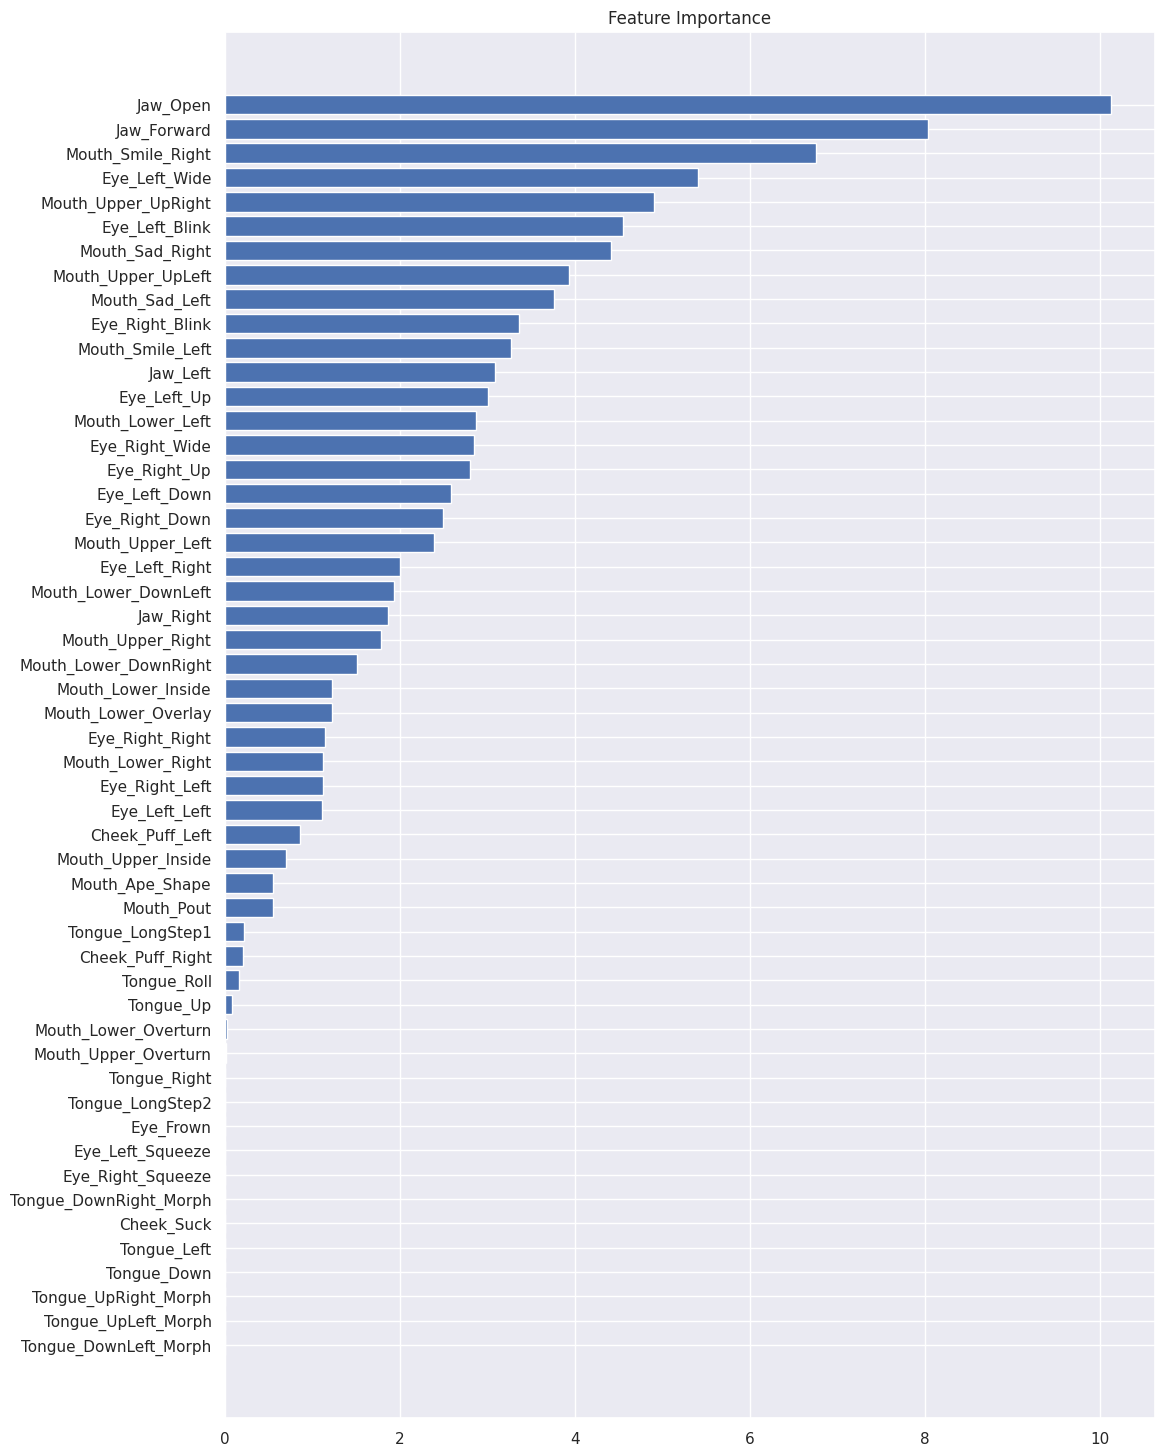

In [ ]:
feature_importance = cat.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 18))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

plt.plot()

In [ ]:
np.array(X_test.columns)[sorted_idx][::-1][:10]

array(['Jaw_Open', 'Jaw_Forward', 'Mouth_Smile_Right', 'Eye_Left_Wide',
       'Mouth_Upper_UpRight', 'Eye_Left_Blink', 'Mouth_Sad_Right',
       'Mouth_Upper_UpLeft', 'Mouth_Sad_Left', 'Eye_Right_Blink'],
      dtype=object)

In [ ]:
estimators = []
estimators.append(('LR', LogisticRegression()))
estimators.append(('DT', DecisionTreeClassifier()))
estimators.append(('RF', RandomForestClassifier()))
estimators.append(('knn', KNeighborsClassifier(**gcv.best_params_)))


In [ ]:
hard_voting = VotingClassifier(estimators = estimators, voting ='soft')
hard_voting.fit(X_train, y_train)
accuracy_score(y_test, hard_voting.predict(X_test))

0.5

# New feature

In [ ]:
X_new = X[np.array(X_test.columns)[sorted_idx][::-1][:10]]
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)


In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_new, y_train)

train_score = accuracy_score(y_train, knn_model.predict(X_train_new))
print(f'Train score of trained model: {train_score*100}')

test_score = accuracy_score(y_test, knn_model.predict(X_test_new))
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 61.712846347607055
Test score of trained model: 42.0


In [ ]:
parameters = {'n_neighbors': range(2, 10),
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'weights': ['uniform', 'distance'],
             'metric': ['manhattan', 'euclidean', 'minkowski'],
             }
gcv = GridSearchCV(knn_model, parameters, cv=5, verbose = 1, n_jobs = -1).fit(X_train_new, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


In [ ]:
print(f'GridSearchView Best Score: {gcv.best_score_*100}')
print(f'GridSearchView Best Estimator: {gcv.best_estimator_}')
print(f'GridSearchView Best Params: {gcv.best_params_}')

GridSearchView Best Score: 52.14873417721518
GridSearchView Best Estimator: KNeighborsClassifier(metric='euclidean', n_neighbors=7)
GridSearchView Best Params: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [ ]:
accuracy_score(y_test, gcv.predict(X_test_new))

0.43

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_new, y_train)
accuracy_score(y_test, lr.predict(X_test_new))

0.46

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train_new, y_train)
accuracy_score(y_test, dt.predict(X_test_new))

0.47

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train_new, y_train)
accuracy_score(y_test, rf.predict(X_test_new))

0.46

In [ ]:
train_pool = Pool(X_train_new, y_train)
test_pool = Pool(X_test_new, y_test)


cat = CatBoostClassifier(iterations=500, max_depth=5, learning_rate=0.05, random_seed=42, logging_level='Silent')
cat.fit(X_train_new, y_train, eval_set=test_pool, use_best_model=True, early_stopping_rounds=10)
accuracy_score(y_test, cat.predict(X_test_new))

0.52

Вывод: отбор признаков не помогает